In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 200)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, accuracy_score, roc_curve

## Load data

In [2]:
df = pd.read_csv("preprocessed_train.csv")
print(df.shape)
df.head()

(458913, 772)


,customer_ID,P_2_mean,P_2_std,P_2_min,P_2_max,P_2_last,D_39_mean,D_39_std,D_39_min,D_39_max,D_39_last,B_1_mean,B_1_std,B_1_min,B_1_max,B_1_last,B_2_mean,B_2_std,B_2_min,B_2_max,B_2_last,R_1_mean,R_1_std,R_1_min,R_1_max,R_1_last,S_3_mean,S_3_std,S_3_min,S_3_max,S_3_last,D_41_mean,D_41_std,D_41_min,D_41_max,D_41_last,B_3_mean,B_3_std,B_3_min,B_3_max,B_3_last,D_43_mean,D_43_std,D_43_min,D_43_max,D_43_last,D_44_mean,D_44_std,D_44_min,D_44_max,D_44_last,B_4_mean,B_4_std,B_4_min,B_4_max,B_4_last,D_45_mean,D_45_std,D_45_min,D_45_max,D_45_last,B_5_mean,B_5_std,B_5_min,B_5_max,B_5_last,R_2_mean,R_2_std,R_2_min,R_2_max,R_2_last,D_46_mean,D_46_std,D_46_min,D_46_max,D_46_last,D_47_mean,D_47_std,D_47_min,D_47_max,D_47_last,D_48_mean,D_48_std,D_48_min,D_48_max,D_48_last,B_6_mean,B_6_std,B_6_min,B_6_max,B_6_last,B_7_mean,B_7_std,B_7_min,B_7_max,B_7_last,B_8_mean,B_8_std,B_8_min,B_8_max,...,D_127_std,D_127_min,D_127_max,D_127_last,D_128_mean,D_128_std,D_128_min,D_128_max,D_128_last,D_129_mean,D_129_std,D_129_min,D_129_max,D_129_last,B_41_mean,B_41_std,B_41_min,B_41_max,B_41_last,D_130_mean,D_130_std,D_130_min,D_130_max,D_130_last,D_131_mean,D_131_std,D_131_min,D_131_max,D_131_last,D_133_mean,D_133_std,D_133_min,D_133_max,D_133_last,R_28_mean,R_28_std,R_28_min,R_28_max,R_28_last,D_139_mean,D_139_std,D_139_min,D_139_max,D_139_last,D_140_mean,D_140_std,D_140_min,D_140_max,D_140_last,D_141_mean,D_141_std,D_141_min,D_141_max,D_141_last,D_143_mean,D_143_std,D_143_min,D_143_max,D_143_last,D_144_mean,D_144_std,D_144_min,D_144_max,D_144_last,D_145_mean,D_145_std,D_145_min,D_145_max,D_145_last,B_30_count,B_30_last,B_30_nunique,B_38_count,B_38_last,B_38_nunique,D_114_count,D_114_last,D_114_nunique,D_116_count,D_116_last,D_116_nunique,D_117_count,D_117_last,D_117_nunique,D_120_count,D_120_last,D_120_nunique,D_126_count,D_126_last,D_126_nunique,D_63_count,D_63_last,D_63_nunique,D_64_count,D_64_last,D_64_nunique,D_68_count,D_68_last,D_68_nunique,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.933782,0.024194,0.8687,0.9604,0.9346,0.010702,0.024440,0.001082,0.091500,0.009120,0.012008,0.006546,0.001930,0.021650,0.009384,1.005183,0.003248,1.0000,1.010,1.0080,0.004509,0.003081,0.000263,0.009224,0.006104,0.113206,0.011665,0.0989,0.1350,0.1350,0.005021,0.003331,0.000685,0.009860,0.001604,0.006456,0.002942,0.000783,0.009865,0.007175,0.088501,0.000000,0.088500,0.08850,0.08850,0.004673,0.002823,0.000630,0.00940,0.003258,0.040308,0.031726,0.000836,0.08100,0.070800,0.725361,0.009530,0.7090,0.7400,0.74000,0.146644,0.047200,0.060500,0.23170,0.231700,0.005754,0.002928,0.001436,0.00992,0.008310,0.378042,0.085663,0.2310,0.5195,0.4204,0.532828,0.006533,0.5215,0.5420,0.5396,0.251399,0.069469,0.135600,0.4036,0.192400,0.113511,0.047368,0.06390,0.2219,0.14950,0.036624,0.023195,0.001681,0.06052,0.05840,0.003586,0.002080,0.000839,0.006466,...,0.003076,1.002000,1.010000,1.009000,1.004132,0.003237,0.999500,1.0080,0.99950,1.005634,0.003040,1.000000,1.009000,1.009000,0.006753,0.002213,0.003222,0.009970,0.003975,0.005195,0.003004,0.001034,0.009850,0.004185,0.005446,0.002357,0.000715,0.00871,0.005703,0.004761,0.003116,0.000122,0.009224,0.006210,0.004089,0.002822,0.000139,0.009125,0.002716,0.003664,0.002616,0.000427,0.009740,0.007187,0.005342,0.002356,0.001976,0.009605,0.004234,0.005178,0.002608,0.000427,0.009384,0.005085,0.005066,0.003565,0.000569,0.009575,0.005810,0.005283,0.002598,0.000610,0.009610,0.002970,0.005813,0.003294,0.000996,0.009830,0.008530,13,0.0,1,13,2.0,1,13,1.0,1,13,0.0,1,13,4.0,1,13,0.0,1,13,1.0,1,13,CR,1,13,O,1,13,6.0,1,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.899827,0.022097,0.8613,0.9290,0.8804,0.215171,0.199123,0.002224,0.567400,0.178100,0.025654,0.027750,0.006710,0.109600,0.034700,0.991098,0.051519,0.8200,1.009,1.0040,0.006246,0.002128,0.001023,0.008995,0.006912,0.120582,0.023842,0.0898,0.1655,0.1655,0.004993,0.002903,0.000728,0.009514,0.005550,0.005664,0.003355,0.000861,0.012860,0.005070,0.118681,0.123343,0.060640,0.52540,0.06064,0.00

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458913 entries, 0 to 458912
Columns: 772 entries, customer_ID to target
dtypes: float64(748), int64(21), object(3)
memory usage: 2.6+ GB


## Preprocessing

In [4]:
df = df.fillna(0)

In [5]:
# Get columns of object type (usually strings)
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['customer_ID', 'D_63_last', 'D_64_last'], dtype='object')


In [6]:
# onehot encoding
df_encoded = pd.get_dummies(df, columns=['D_63_last', 'D_64_last'], drop_first = True)
print(df_encoded.shape)
df_encoded.head()

(458913, 778)


,customer_ID,P_2_mean,P_2_std,P_2_min,P_2_max,P_2_last,D_39_mean,D_39_std,D_39_min,D_39_max,D_39_last,B_1_mean,B_1_std,B_1_min,B_1_max,B_1_last,B_2_mean,B_2_std,B_2_min,B_2_max,B_2_last,R_1_mean,R_1_std,R_1_min,R_1_max,R_1_last,S_3_mean,S_3_std,S_3_min,S_3_max,S_3_last,D_41_mean,D_41_std,D_41_min,D_41_max,D_41_last,B_3_mean,B_3_std,B_3_min,B_3_max,B_3_last,D_43_mean,D_43_std,D_43_min,D_43_max,D_43_last,D_44_mean,D_44_std,D_44_min,D_44_max,D_44_last,B_4_mean,B_4_std,B_4_min,B_4_max,B_4_last,D_45_mean,D_45_std,D_45_min,D_45_max,D_45_last,B_5_mean,B_5_std,B_5_min,B_5_max,B_5_last,R_2_mean,R_2_std,R_2_min,R_2_max,R_2_last,D_46_mean,D_46_std,D_46_min,D_46_max,D_46_last,D_47_mean,D_47_std,D_47_min,D_47_max,D_47_last,D_48_mean,D_48_std,D_48_min,D_48_max,D_48_last,B_6_mean,B_6_std,B_6_min,B_6_max,B_6_last,B_7_mean,B_7_std,B_7_min,B_7_max,B_7_last,B_8_mean,B_8_std,B_8_min,B_8_max,...,D_128_min,D_128_max,D_128_last,D_129_mean,D_129_std,D_129_min,D_129_max,D_129_last,B_41_mean,B_41_std,B_41_min,B_41_max,B_41_last,D_130_mean,D_130_std,D_130_min,D_130_max,D_130_last,D_131_mean,D_131_std,D_131_min,D_131_max,D_131_last,D_133_mean,D_133_std,D_133_min,D_133_max,D_133_last,R_28_mean,R_28_std,R_28_min,R_28_max,R_28_last,D_139_mean,D_139_std,D_139_min,D_139_max,D_139_last,D_140_mean,D_140_std,D_140_min,D_140_max,D_140_last,D_141_mean,D_141_std,D_141_min,D_141_max,D_141_last,D_143_mean,D_143_std,D_143_min,D_143_max,D_143_last,D_144_mean,D_144_std,D_144_min,D_144_max,D_144_last,D_145_mean,D_145_std,D_145_min,D_145_max,D_145_last,B_30_count,B_30_last,B_30_nunique,B_38_count,B_38_last,B_38_nunique,D_114_count,D_114_last,D_114_nunique,D_116_count,D_116_last,D_116_nunique,D_117_count,D_117_last,D_117_nunique,D_120_count,D_120_last,D_120_nunique,D_126_count,D_126_last,D_126_nunique,D_63_count,D_63_nunique,D_64_count,D_64_nunique,D_68_count,D_68_last,D_68_nunique,target,D_63_last_CO,D_63_last_CR,D_63_last_XL,D_63_last_XM,D_63_last_XZ,D_64_last_O,D_64_last_R,D_64_last_U
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.933782,0.024194,0.8687,0.9604,0.9346,0.010702,0.024440,0.001082,0.091500,0.009120,0.012008,0.006546,0.001930,0.021650,0.009384,1.005183,0.003248,1.0000,1.010,1.0080,0.004509,0.003081,0.000263,0.009224,0.006104,0.113206,0.011665,0.0989,0.1350,0.1350,0.005021,0.003331,0.000685,0.009860,0.001604,0.006456,0.002942,0.000783,0.009865,0.007175,0.088501,0.000000,0.088500,0.08850,0.08850,0.004673,0.002823,0.000630,0.00940,0.003258,0.040308,0.031726,0.000836,0.08100,0.070800,0.725361,0.009530,0.7090,0.7400,0.74000,0.146644,0.047200,0.060500,0.23170,0.231700,0.005754,0.002928,0.001436,0.00992,0.008310,0.378042,0.085663,0.2310,0.5195,0.4204,0.532828,0.006533,0.5215,0.5420,0.5396,0.251399,0.069469,0.135600,0.4036,0.192400,0.113511,0.047368,0.06390,0.2219,0.14950,0.036624,0.023195,0.001681,0.06052,0.05840,0.003586,0.002080,0.000839,0.006466,...,0.999500,1.0080,0.99950,1.005634,0.003040,1.000000,1.009000,1.009000,0.006753,0.002213,0.003222,0.009970,0.003975,0.005195,0.003004,0.001034,0.009850,0.004185,0.005446,0.002357,0.000715,0.00871,0.005703,0.004761,0.003116,0.000122,0.009224,0.006210,0.004089,0.002822,0.000139,0.009125,0.002716,0.003664,0.002616,0.000427,0.009740,0.007187,0.005342,0.002356,0.001976,0.009605,0.004234,0.005178,0.002608,0.000427,0.009384,0.005085,0.005066,0.003565,0.000569,0.009575,0.005810,0.005283,0.002598,0.000610,0.009610,0.002970,0.005813,0.003294,0.000996,0.009830,0.008530,13,0.0,1,13,2.0,1,13,1.0,1,13,0.0,1,13,4.0,1,13,0.0,1,13,1.0,1,13,1,13,1,13,6.0,1,0,False,True,False,False,False,True,False,False
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.899827,0.022097,0.8613,0.9290,0.8804,0.215171,0.199123,0.002224,0.567400,0.178100,0.025654,0.027750,0.006710,0.109600,0.034700,0.991098,0.051519,0.8200,1.009,1.0040,0.006246,0.002128,0.001023,0.008995,0.006912,0.120582,0.023842,0.0898,0.1655,0.1655,0.004993,0.002903,0.000728,0.009514,0.005550,0.005664,0.003355,0.000861,0.012860,0.005070,0.118681,0.123343,0.060640,0.52540,0.0606

In [7]:
# split into input (X) and output (Y) variables
X = df_encoded.drop(columns=['customer_ID','target']).values.astype(float)
Y = df_encoded[['target']].values

In [8]:
# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(30, input_shape=(776,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
# evaluate model with standardized dataset
estimator = KerasClassifier(model=create_baseline, epochs=10, batch_size=5, verbose=2)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
66084/66084 - 52s - 784us/step - accuracy: 0.8938 - loss: 0.2425
Epoch 2/10
66084/66084 - 51s - 774us/step - accuracy: 0.8975 - loss: 0.2327
Epoch 3/10
66084/66084 - 50s - 762us/step - accuracy: 0.8980 - loss: 0.2304
Epoch 4/10
66084/66084 - 50s - 753us/step - accuracy: 0.8988 - loss: 0.2291
Epoch 5/10
66084/66084 - 51s - 773us/step - accuracy: 0.8994 - loss: 0.2282
Epoch 6/10
66084/66084 - 55s - 832us/step - accuracy: 0.8995 - loss: 0.2275
Epoch 7/10
66084/66084 - 55s - 825us/step - accuracy: 0.9000 - loss: 0.2271
Epoch 8/10
66084/66084 - 56s - 849us/step - accuracy: 0.9005 - loss: 0.2278
Epoch 9/10
66084/66084 - 56s - 848us/step - accuracy: 0.9002 - loss: 0.2267
Epoch 10/10
66084/66084 - 56s - 849us/step - accuracy: 0.9006 - loss: 0.2259
7343/7343 - 5s - 629us/step


/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
66084/66084 - 56s - 841us/step - accuracy: 0.8933 - loss: 0.2436
Epoch 2/10
66084/66084 - 56s - 844us/step - accuracy: 0.8975 - loss: 0.2327
Epoch 3/10
66084/66084 - 54s - 810us/step - accuracy: 0.8983 - loss: 0.2311
Epoch 4/10
66084/66084 - 56s - 855us/step - accuracy: 0.8987 - loss: 0.2295
Epoch 5/10
66084/66084 - 56s - 843us/step - accuracy: 0.8994 - loss: 0.2293
Epoch 6/10
66084/66084 - 56s - 854us/step - accuracy: 0.8997 - loss: 0.2291
Epoch 7/10
66084/66084 - 63s - 947us/step - accuracy: 0.9000 - loss: 0.2283
Epoch 8/10
66084/66084 - 76s - 1ms/step - accuracy: 0.9004 - loss: 0.2281
Epoch 9/10
66084/66084 - 72s - 1ms/step - accuracy: 0.9003 - loss: 0.2281
Epoch 10/10
66084/66084 - 66s - 994us/step - accuracy: 0.9003 - loss: 0.2279
7343/7343 - 6s - 828us/step


/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
66084/66084 - 64s - 969us/step - accuracy: 0.8933 - loss: 0.2432
Epoch 2/10
66084/66084 - 65s - 979us/step - accuracy: 0.8971 - loss: 0.2334
Epoch 3/10
66084/66084 - 65s - 980us/step - accuracy: 0.8981 - loss: 0.2318
Epoch 4/10
66084/66084 - 65s - 990us/step - accuracy: 0.8988 - loss: 0.2298
Epoch 5/10
66084/66084 - 60s - 908us/step - accuracy: 0.8992 - loss: 0.2293
Epoch 6/10
66084/66084 - 64s - 964us/step - accuracy: 0.8996 - loss: 0.2283
Epoch 7/10
66084/66084 - 60s - 915us/step - accuracy: 0.8995 - loss: 0.2283
Epoch 8/10
66084/66084 - 67s - 1ms/step - accuracy: 0.8997 - loss: 0.2280
Epoch 9/10
66084/66084 - 68s - 1ms/step - accuracy: 0.9001 - loss: 0.2278
Epoch 10/10
66084/66084 - 64s - 965us/step - accuracy: 0.9003 - loss: 0.2271
7343/7343 - 5s - 685us/step


/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
66084/66084 - 57s - 870us/step - accuracy: 0.8934 - loss: 0.2414
Epoch 2/10
66084/66084 - 59s - 890us/step - accuracy: 0.8971 - loss: 0.2335
Epoch 3/10
66084/66084 - 58s - 873us/step - accuracy: 0.8987 - loss: 0.2311
Epoch 4/10
66084/66084 - 57s - 868us/step - accuracy: 0.8990 - loss: 0.2299
Epoch 5/10
66084/66084 - 58s - 876us/step - accuracy: 0.8991 - loss: 0.2290
Epoch 6/10
66084/66084 - 57s - 862us/step - accuracy: 0.8997 - loss: 0.2286
Epoch 7/10
66084/66084 - 60s - 904us/step - accuracy: 0.8997 - loss: 0.2277
Epoch 8/10
66084/66084 - 68s - 1ms/step - accuracy: 0.8997 - loss: 0.2280
Epoch 9/10
66084/66084 - 65s - 977us/step - accuracy: 0.8999 - loss: 0.2276
Epoch 10/10
66084/66084 - 64s - 974us/step - accuracy: 0.9004 - loss: 0.2273
7343/7343 - 6s - 807us/step


/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
66084/66084 - 62s - 932us/step - accuracy: 0.8937 - loss: 0.2423
Epoch 2/10
66084/66084 - 62s - 944us/step - accuracy: 0.8976 - loss: 0.2322
Epoch 3/10
66084/66084 - 64s - 974us/step - accuracy: 0.8982 - loss: 0.2316
Epoch 4/10
66084/66084 - 65s - 979us/step - accuracy: 0.8992 - loss: 0.2304
Epoch 5/10
66084/66084 - 59s - 894us/step - accuracy: 0.8993 - loss: 0.2299
Epoch 6/10
66084/66084 - 57s - 861us/step - accuracy: 0.8994 - loss: 0.2286
Epoch 7/10
66084/66084 - 77s - 1ms/step - accuracy: 0.8997 - loss: 0.2282
Epoch 8/10
66084/66084 - 60s - 911us/step - accuracy: 0.9000 - loss: 0.2281
Epoch 9/10
66084/66084 - 60s - 905us/step - accuracy: 0.9003 - loss: 0.2284
Epoch 10/10
66084/66084 - 58s - 875us/step - accuracy: 0.9004 - loss: 0.2278
7343/7343 - 6s - 776us/step


/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
66084/66084 - 59s - 893us/step - accuracy: 0.8935 - loss: 0.2438
Epoch 2/10
66084/66084 - 58s - 883us/step - accuracy: 0.8973 - loss: 0.2332
Epoch 3/10
66084/66084 - 62s - 934us/step - accuracy: 0.8983 - loss: 0.2306
Epoch 4/10
66084/66084 - 76s - 1ms/step - accuracy: 0.8989 - loss: 0.2299
Epoch 5/10
66084/66084 - 78s - 1ms/step - accuracy: 0.8997 - loss: 0.2290
Epoch 6/10
66084/66084 - 77s - 1ms/step - accuracy: 0.8998 - loss: 0.2281
Epoch 7/10
66084/66084 - 71s - 1ms/step - accuracy: 0.9002 - loss: 0.2281
Epoch 8/10
66084/66084 - 74s - 1ms/step - accuracy: 0.9003 - loss: 0.2281
Epoch 9/10
66084/66084 - 79s - 1ms/step - accuracy: 0.9006 - loss: 0.2274
Epoch 10/10
66084/66084 - 75s - 1ms/step - accuracy: 0.9004 - loss: 0.2270
7343/7343 - 7s - 886us/step


/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
66084/66084 - 82s - 1ms/step - accuracy: 0.8934 - loss: 0.2422
Epoch 2/10
66084/66084 - 80s - 1ms/step - accuracy: 0.8973 - loss: 0.2333
Epoch 3/10
66084/66084 - 71s - 1ms/step - accuracy: 0.8983 - loss: 0.2315
Epoch 4/10
66084/66084 - 77s - 1ms/step - accuracy: 0.8991 - loss: 0.2301
Epoch 5/10
66084/66084 - 87s - 1ms/step - accuracy: 0.8996 - loss: 0.2294
Epoch 6/10
66084/66084 - 73s - 1ms/step - accuracy: 0.9001 - loss: 0.2285
Epoch 7/10
66084/66084 - 69s - 1ms/step - accuracy: 0.9003 - loss: 0.2278
Epoch 8/10
66084/66084 - 75s - 1ms/step - accuracy: 0.9001 - loss: 0.2284
Epoch 9/10
66084/66084 - 56s - 851us/step - accuracy: 0.9005 - loss: 0.2276
Epoch 10/10
66084/66084 - 77s - 1ms/step - accuracy: 0.9008 - loss: 0.2267
7343/7343 - 6s - 800us/step


/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
66084/66084 - 69s - 1ms/step - accuracy: 0.8938 - loss: 0.2439
Epoch 2/10
66084/66084 - 70s - 1ms/step - accuracy: 0.8974 - loss: 0.2324
Epoch 3/10
66084/66084 - 63s - 952us/step - accuracy: 0.8985 - loss: 0.2307
Epoch 4/10
66084/66084 - 62s - 939us/step - accuracy: 0.8992 - loss: 0.2296
Epoch 5/10
66084/66084 - 62s - 937us/step - accuracy: 0.8995 - loss: 0.2285
Epoch 6/10
66084/66084 - 60s - 903us/step - accuracy: 0.8997 - loss: 0.2284
Epoch 7/10
66084/66084 - 62s - 939us/step - accuracy: 0.9000 - loss: 0.2274
Epoch 8/10
66084/66084 - 62s - 938us/step - accuracy: 0.9000 - loss: 0.2274
Epoch 9/10
66084/66084 - 62s - 931us/step - accuracy: 0.9002 - loss: 0.2274
Epoch 10/10
66084/66084 - 59s - 899us/step - accuracy: 0.9009 - loss: 0.2269
7343/7343 - 6s - 764us/step


/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
66084/66084 - 62s - 940us/step - accuracy: 0.8932 - loss: 0.2425
Epoch 2/10
66084/66084 - 58s - 884us/step - accuracy: 0.8972 - loss: 0.2332
Epoch 3/10
66084/66084 - 55s - 828us/step - accuracy: 0.8979 - loss: 0.2318
Epoch 4/10
66084/66084 - 55s - 826us/step - accuracy: 0.8983 - loss: 0.2308
Epoch 5/10
66084/66084 - 56s - 849us/step - accuracy: 0.8985 - loss: 0.2295
Epoch 6/10
66084/66084 - 54s - 818us/step - accuracy: 0.8994 - loss: 0.2286
Epoch 7/10
66084/66084 - 55s - 834us/step - accuracy: 0.8993 - loss: 0.2284
Epoch 8/10
66084/66084 - 56s - 853us/step - accuracy: 0.8992 - loss: 0.2281
Epoch 9/10
66084/66084 - 54s - 815us/step - accuracy: 0.8995 - loss: 0.2283
Epoch 10/10
66084/66084 - 57s - 858us/step - accuracy: 0.8999 - loss: 0.2278
7343/7343 - 6s - 793us/step


/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
66084/66084 - 55s - 829us/step - accuracy: 0.8935 - loss: 0.2421
Epoch 2/10
66084/66084 - 55s - 829us/step - accuracy: 0.8976 - loss: 0.2331
Epoch 3/10
66084/66084 - 58s - 874us/step - accuracy: 0.8982 - loss: 0.2312
Epoch 4/10
66084/66084 - 46s - 691us/step - accuracy: 0.8989 - loss: 0.2302
Epoch 5/10
66084/66084 - 44s - 673us/step - accuracy: 0.8995 - loss: 0.2290
Epoch 6/10
66084/66084 - 44s - 667us/step - accuracy: 0.8997 - loss: 0.2282
Epoch 7/10
66084/66084 - 45s - 675us/step - accuracy: 0.8999 - loss: 0.2278
Epoch 8/10
66084/66084 - 44s - 666us/step - accuracy: 0.8999 - loss: 0.2273
Epoch 9/10
66084/66084 - 44s - 659us/step - accuracy: 0.9005 - loss: 0.2271
Epoch 10/10
66084/66084 - 44s - 670us/step - accuracy: 0.9003 - loss: 0.2279
7343/7343 - 4s - 531us/step
Baseline: 89.97% (0.08%)


In [12]:
# evaluate baseline model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_baseline, epochs=10, batch_size=5, verbose=2)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = cross_val_score(pipeline, X_train, y_train, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
58741/58741 - 43s - 730us/step - accuracy: 0.8961 - loss: 0.2364
Epoch 2/10
58741/58741 - 37s - 629us/step - accuracy: 0.8992 - loss: 0.2311
Epoch 3/10
58741/58741 - 37s - 623us/step - accuracy: 0.9002 - loss: 0.2304
Epoch 4/10
58741/58741 - 37s - 625us/step - accuracy: 0.9006 - loss: 0.2297
Epoch 5/10
58741/58741 - 37s - 625us/step - accuracy: 0.9011 - loss: 0.2286
Epoch 6/10
58741/58741 - 38s - 642us/step - accuracy: 0.9012 - loss: 0.2290
Epoch 7/10
58741/58741 - 37s - 628us/step - accuracy: 0.9013 - loss: 0.2295
Epoch 8/10
58741/58741 - 39s - 660us/step - accuracy: 0.9019 - loss: 0.2297
Epoch 9/10
58741/58741 - 38s - 652us/step - accuracy: 0.9019 - loss: 0.2296
Epoch 10/10
58741/58741 - 38s - 642us/step - accuracy: 0.9020 - loss: 0.2295
14686/14686 - 7s - 497us/step


/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
58741/58741 - 38s - 638us/step - accuracy: 0.8950 - loss: 0.2382
Epoch 2/10
58741/58741 - 37s - 632us/step - accuracy: 0.8991 - loss: 0.2316
Epoch 3/10
58741/58741 - 40s - 685us/step - accuracy: 0.9000 - loss: 0.2302
Epoch 4/10
58741/58741 - 38s - 652us/step - accuracy: 0.9007 - loss: 0.2297
Epoch 5/10
58741/58741 - 40s - 678us/step - accuracy: 0.9009 - loss: 0.2306
Epoch 6/10
58741/58741 - 38s - 655us/step - accuracy: 0.9015 - loss: 0.2298
Epoch 7/10
58741/58741 - 37s - 627us/step - accuracy: 0.9018 - loss: 0.2287
Epoch 8/10
58741/58741 - 41s - 692us/step - accuracy: 0.9021 - loss: 0.2302
Epoch 9/10
58741/58741 - 38s - 651us/step - accuracy: 0.9022 - loss: 0.2315
Epoch 10/10
58741/58741 - 38s - 639us/step - accuracy: 0.9019 - loss: 0.2315
14686/14686 - 7s - 503us/step


/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
58741/58741 - 38s - 648us/step - accuracy: 0.8954 - loss: 0.2377
Epoch 2/10
58741/58741 - 37s - 632us/step - accuracy: 0.8993 - loss: 0.2316
Epoch 3/10
58741/58741 - 38s - 643us/step - accuracy: 0.8997 - loss: 0.2304
Epoch 4/10
58741/58741 - 38s - 640us/step - accuracy: 0.9007 - loss: 0.2306
Epoch 5/10
58741/58741 - 38s - 641us/step - accuracy: 0.9007 - loss: 0.2312
Epoch 6/10
58741/58741 - 37s - 628us/step - accuracy: 0.9009 - loss: 0.2309
Epoch 7/10
58741/58741 - 37s - 625us/step - accuracy: 0.9014 - loss: 0.2312
Epoch 8/10
58741/58741 - 37s - 625us/step - accuracy: 0.9010 - loss: 0.2309
Epoch 9/10
58741/58741 - 37s - 622us/step - accuracy: 0.9015 - loss: 0.2334
Epoch 10/10
58741/58741 - 37s - 625us/step - accuracy: 0.9019 - loss: 0.2319
14686/14686 - 7s - 481us/step


/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
58741/58741 - 37s - 634us/step - accuracy: 0.8952 - loss: 0.2383
Epoch 2/10
58741/58741 - 36s - 621us/step - accuracy: 0.8989 - loss: 0.2318
Epoch 3/10
58741/58741 - 37s - 621us/step - accuracy: 0.8998 - loss: 0.2311
Epoch 4/10
58741/58741 - 37s - 636us/step - accuracy: 0.9000 - loss: 0.2306
Epoch 5/10
58741/58741 - 41s - 706us/step - accuracy: 0.9006 - loss: 0.2302
Epoch 6/10
58741/58741 - 36s - 621us/step - accuracy: 0.9010 - loss: 0.2299
Epoch 7/10
58741/58741 - 40s - 685us/step - accuracy: 0.9013 - loss: 0.2313
Epoch 8/10
58741/58741 - 40s - 676us/step - accuracy: 0.9010 - loss: 0.2312
Epoch 9/10
58741/58741 - 40s - 683us/step - accuracy: 0.9017 - loss: 0.2303
Epoch 10/10
58741/58741 - 39s - 668us/step - accuracy: 0.9014 - loss: 0.2324
14686/14686 - 8s - 543us/step


/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
58741/58741 - 41s - 694us/step - accuracy: 0.8958 - loss: 0.2377
Epoch 2/10
58741/58741 - 37s - 626us/step - accuracy: 0.8989 - loss: 0.2312
Epoch 3/10
58741/58741 - 37s - 636us/step - accuracy: 0.9001 - loss: 0.2302
Epoch 4/10
58741/58741 - 41s - 692us/step - accuracy: 0.9007 - loss: 0.2303
Epoch 5/10
58741/58741 - 36s - 619us/step - accuracy: 0.9009 - loss: 0.2305
Epoch 6/10
58741/58741 - 37s - 630us/step - accuracy: 0.9012 - loss: 0.2302
Epoch 7/10
58741/58741 - 40s - 687us/step - accuracy: 0.9015 - loss: 0.2303
Epoch 8/10
58741/58741 - 44s - 751us/step - accuracy: 0.9019 - loss: 0.2313
Epoch 9/10
58741/58741 - 43s - 732us/step - accuracy: 0.9026 - loss: 0.2288
Epoch 10/10
58741/58741 - 40s - 685us/step - accuracy: 0.9025 - loss: 0.2306
14686/14686 - 7s - 510us/step
Standardized: 89.87% (0.10%)


In [15]:
model = pipeline.fit(X_train, y_train)

/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
73426/73426 - 53s - 718us/step - accuracy: 0.8961 - loss: 0.2368
Epoch 2/10
73426/73426 - 47s - 639us/step - accuracy: 0.8989 - loss: 0.2316
Epoch 3/10
73426/73426 - 47s - 637us/step - accuracy: 0.9000 - loss: 0.2313
Epoch 4/10
73426/73426 - 48s - 659us/step - accuracy: 0.8998 - loss: 0.2319
Epoch 5/10
73426/73426 - 47s - 639us/step - accuracy: 0.9006 - loss: 0.2305
Epoch 6/10
73426/73426 - 53s - 722us/step - accuracy: 0.9008 - loss: 0.2327
Epoch 7/10
73426/73426 - 45s - 611us/step - accuracy: 0.9009 - loss: 0.2333
Epoch 8/10
73426/73426 - 46s - 627us/step - accuracy: 0.9014 - loss: 0.2347
Epoch 9/10
73426/73426 - 45s - 607us/step - accuracy: 0.9012 - loss: 0.2340
Epoch 10/10
73426/73426 - 44s - 606us/step - accuracy: 0.9015 - loss: 0.2353


## Evaluation

In [16]:
# do prediction
y_pred = pipeline.predict(X_test)

18357/18357 - 9s - 489us/step


In [38]:
# do prediction
y_pred_proba = pipeline.predict_proba(X_test)
y_pred_positive_proba = y_pred_proba[:, 1]

In [28]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy}')

accuracy: 0.8991861237919876


In [21]:
# F1
f1 = f1_score(y_test, y_pred)
print(f'F1 score: {f1}')

F1 score: 0.799349452455817


In [23]:
# AUC
auc = roc_auc_score(y_test, y_pred)
print(f'AUC score: {auc}')

AUC score: 0.8610912556476067


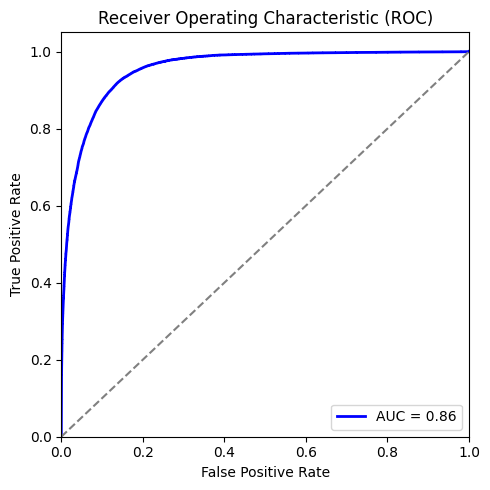

In [40]:
# AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_positive_proba)

# Plot AUC-ROC
plt.figure(figsize=(5, 5))

# ROC Curve plot
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [26]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[64099,  4141],
       [ 5112, 18431]])

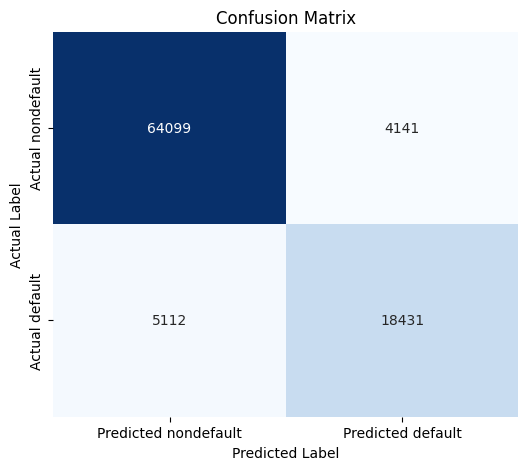

In [41]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted nondefault', 'Predicted default'], 
            yticklabels=['Actual nondefault', 'Actual default'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()